In [128]:
import numpy as np
import matplotlib.pyplot as plt

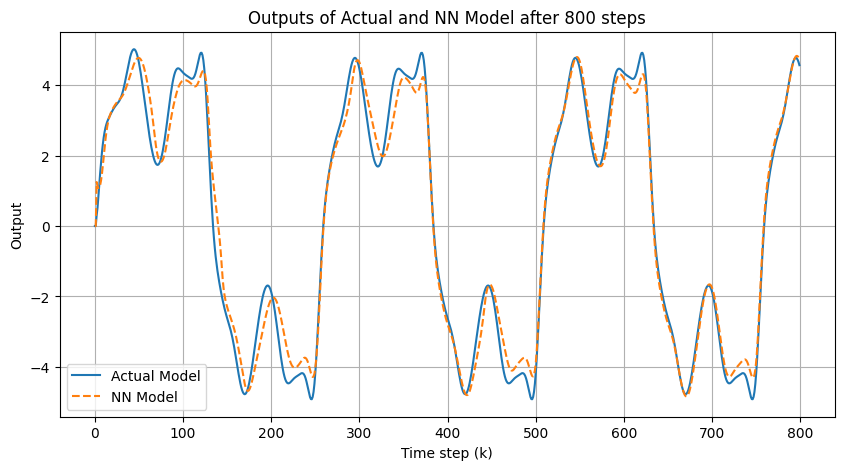

In [127]:
#Define the plant_model model function
def plant_model(y_p, y_p_prev, u):
    return 0.3 * y_p + 0.6 * y_p_prev + u

#Define unknown function
def f(u):
    return 0.6 * np.sin(np.pi * u) + 0.3 * np.sin(3 * np.pi * u) + 0.1 * np.sin(5 * np.pi * u)

#Define tanh and its derivative activation functions
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.power(np.tanh(x), 2)

#Define NN (3-Layer)
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
    # Initialize weights and biases
        self.w1 = np.random.randn(input_size, hidden_size1)
        self.w2 = np.random.randn(hidden_size1, hidden_size2)
        self.w3 = np.random.randn(hidden_size2, output_size)
        self.b1 = np.random.randn(hidden_size1)
        self.b2 = np.random.randn(hidden_size2)
        self.b3 = np.random.randn(output_size)

    #Forward prop
    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = tanh(self.z2)
        self.z3 = np.dot(self.a2, self.w3) + self.b3
        self.output = self.z3
        return self.output
    
    #Backprop
    def backward(self, x, y, o, learning_rate):
        error = y - o
        d_output = error  
        d_hidden_layer2 = np.dot(d_output, self.w3.T) * tanh_derivative(self.z2)
        d_hidden_layer1 = np.dot(d_hidden_layer2, self.w2.T) * tanh_derivative(self.z1)

        #Update weights and biases
        self.w3 += np.dot(self.a2.T, d_output) * learning_rate
        self.b3 += np.sum(d_output, axis=0) * learning_rate
        self.w2 += np.dot(self.a1.T, d_hidden_layer2) * learning_rate
        self.b2 += np.sum(d_hidden_layer2, axis=0) * learning_rate
        self.w1 += np.dot(x.T, d_hidden_layer1) * learning_rate
        self.b1 += np.sum(d_hidden_layer1, axis=0) * learning_rate

#Training Parameters
k_steps = 800
learning_rate = 0.01

#Initialize the both model outputs (y_p = plant model , y_p_hat = NN model)
y_p = np.zeros(k_steps)
y_p_hat = np.zeros(k_steps)

#Initialize the NN parameters (1, 20, 10, 1 neurons by layer)
nn = NeuralNetwork(1, 20, 10, 1)

losses = []

#Train NN function
for k in range(2, k_steps):
    
    #Used a sinusoidal input of k_steps
    u = np.sin(2 * np.pi * k / 250)
    
    #Calculate actual plant_model output
    y_p[k] = plant_model(y_p[k-1], y_p[k-2], f(u))
    
    #Forward pass
    y_p_hat[k] = nn.forward(np.array([[u]]))
    
    #Backward pass
    nn.backward(np.array([[u]]), np.array([[y_p[k]]]), y_p_hat[k], learning_rate)

    #Track MSE loss
    if k % 100 == 0:
        loss = np.mean((y_p[:k] - y_p_hat[:k]) ** 2)
        losses.append((k, loss))

#losses

plt.figure(figsize=(10, 5))
plt.plot(y_p, label='Actual Model')
plt.plot(y_p_hat.flatten(), label='NN Model', linestyle='--')
plt.title('Outputs of Actual and NN Model after 800 steps')
plt.xlabel('Time step (k)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

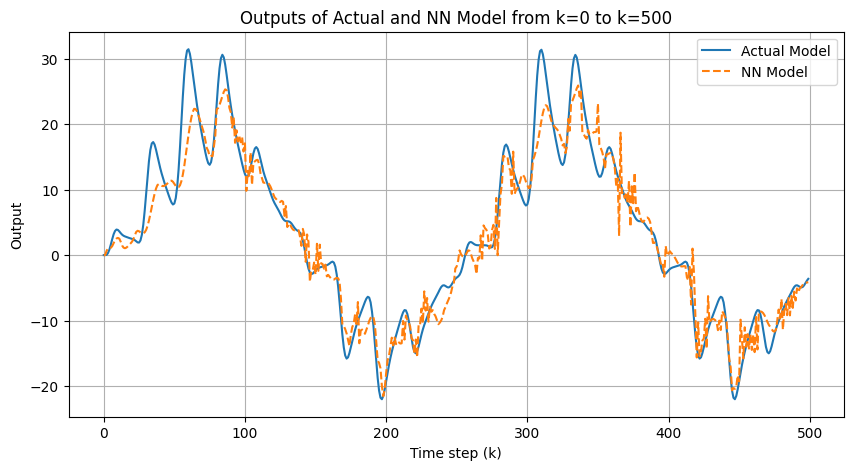

In [126]:
###Change unknown function and sinusoidal input

#Define unknown function
def f(u):
    return u**3 + 0.3 * u**2 - 0.4 * u

#Training Parameters
k_steps = 50000
learning_rate = 0.01

#Initialize the both model outputs (y_p = plant model , y_p_hat = NN model)
y_p = np.zeros(k_steps)
y_p_hat = np.zeros(k_steps)

#Initialize the NN parameters (1, 20, 10, 1 neurons by layer)
nn = NeuralNetwork(1, 20, 10, 1)

losses = []

#Train NN function
for k in range(2, k_steps):
    
    #Used a sinusoidal input of k_steps
    u = np.sin(2 * np.pi * k / 250) + np.sin(2 * np.pi * k / 25)
    
    #Calculate actual plant_model output
    y_p[k] = plant_model(y_p[k-1], y_p[k-2], f(u))
    
    #Forward pass
    y_p_hat[k] = nn.forward(np.array([[u]]))
    
    #Backward pass
    nn.backward(np.array([[u]]), np.array([[y_p[k]]]), y_p_hat[k], learning_rate)

    #Track MSE loss
    if k % 100 == 0:
        loss = np.mean((y_p[:k] - y_p_hat[:k]) ** 2)
        losses.append((k, loss))

#losses


# Plotting the range from 
plt.figure(figsize=(10, 5))
plt.plot(y_p[0:500], label='Actual Model') 
plt.plot(y_p_hat[0:500].flatten(), label='NN Model', linestyle='--')  
plt.title('Outputs of Actual and NN Model from k=0 to k=500')
plt.xlabel('Time step (k)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()